# Hypothesis testing

## linear hypothesis

In the context of the classical linear regression model, a linear hypothesis refers to a formal statement or conjecture about the relationship between the predictor variables and the dependent variable that can be tested using the model's framework. It primarily deals with the coefficients or parameters of the predictor variables in the model.
A "linear hypothesis" in this context is about the relationship (often in terms of size or significance) between the predictors and the dependent variable in a linear model, as captured by the coefficients $\beta$.

A linear hypothesis in this context typically takes the form of a statement about the value or values of the $\beta$ coefficients. The general form is 

$$H_0: Rβ = r$$

**Single Parameter Hypothesis**: 
    - Hypothesizing that a particular predictor, say $x_1$, has no effect on $y$. This can be stated as:
      $H_0: β_1 = 0$, $H_a: β_1 ≠ 0$.

**Multiple Parameters Hypothesis**:
    - Testing the combined effect of multiple predictors. For example, to test whether the second and third predictors both have no effect on $y$, the hypothesis can be:
      $H_0: β_2 = β_3 = 0$, $H_a:$ at least one of them is not zero.

**Comparing Coefficients**:
    - One can test if two predictors have the same effect on $y$. This can be posed as:
      $H_0: β_1 = β_2$, $H_a: β_1 ≠ β_2$

To test these hypotheses, various statistical tests like the t-test (for individual coefficients) or the F-test (for joint significance of multiple coefficients) are employed. The structure and assumptions of the classical linear regression model allow for such tests to be conducted under a framework that assumes linearity, homoscedasticity (constant variance of error terms), independence of error terms, and often the normality of error terms.

**Specify the Hypothesis**: 

Given the model $y = x'β + ε$, we have:

$$H_0: Rβ = r$$

Where $R$ is a $q \times p$ matrix (with $q$ being the number of restrictions) that imposes linear restrictions on the parameter vector $β$, and $r$ is a $q \times 1$ vector containing the values that the restricted parameters are hypothesized to be equal to.

**Estimate the Unrestricted Model**:

Estimate the regression model without any constraints on the coefficients. Obtain the sum of squared residuals from this regression, which we'll call ${SSR}_{U}$.

**Estimate the Restricted Model**:

Under the null hypothesis $H_0$, some coefficients will have restrictions. Using these restrictions, re-estimate the regression model and obtain the sum of squared residuals, denoted as ${SSR}_{R}$.

**Compute the F-ratio**:

$$F = \frac{\left({SSR}_{R} - {SSR}_{U}\right)/q}{{SSR}_{U}/(n - p)}$$

Where:
$n$ is the number of observations; $p$ is the number of parameters in the unrestricted model; $q$ is the number of restrictions imposed under the null hypothesis.

**Determine the Critical Value and Make a Decision**:

The computed F-ratio is then compared to a critical value from the F-distribution with $q$ and $n - p$ degrees of freedom. If the computed F-ratio exceeds the critical value, we reject the null hypothesis at the chosen significance level.

**Interpret the Result**:

- If we fail to reject $H_0$: The restrictions imposed by the null hypothesis cannot be rejected; that is, the constraints seem to be consistent with the data.
- If we reject $H_0$: The data does not support the restrictions imposed by the null hypothesis; the constraints are not consistent with the data.


**Assumptions**

I. Linearity:
$$
\mathbf{y}=\mathbf{X} \boldsymbol{\beta}+\boldsymbol{\varepsilon}
$$
II. Strict Exogeneity:
$$
\mathbb{E}[\varepsilon \mid \mathbf{X}]=0
$$
III. No Multicollinearity:
$$
\mathbb{P}[\operatorname{rank}(\mathbf{X})=p]=1
$$
IV. Spherical Errors:
$$
\operatorname{var}[\boldsymbol{\varepsilon} \mid \mathbf{X}]=\sigma^2 \boldsymbol{I}_n
$$
V. Normality:
$$
\boldsymbol{\varepsilon} \mid \mathbf{X} \sim \mathcal{N}\left(0, \sigma^2 \boldsymbol{I}_n\right)
$$

Given the regression model $y = Xβ + ε$, and under the null hypothesis $H_0: Rβ = r$ (where $R$ imposes $d$ restrictions on $β$), we have two sum of squared residuals: $SSR_{R}$ from the model where restrictions are imposed, and $SSR_{U}$ from the model without restrictions.

The F-ratio is given by: (proved in textbook Page 42)
$$ F = \frac{(SSR_{R} - SSR_{U})/d}{SSR_{U}/(n-p)} $$

Now, under the null hypothesis and the assumptions stated:

- The numerator $\frac{SSR_{R} - SSR_{U}}{d}$ follows a chi-squared distribution with $d$ degrees of freedom. This is because the restricted and unrestricted SSRs both derive from the sum of squared normal errors due to the normality assumption.
  
- The denominator $\frac{SSR_{U}}{n-p}$ also follows a chi-squared distribution, but with $n-p$ degrees of freedom.

The ratio of two chi-squared distributed variables (when appropriately scaled) follows an F-distribution (proved in class notes 1). Therefore:
$$ F | X, H_0 \sim F_{d, n-p} $$

Thus, under the stated assumptions and the null hypothesis, the F-ratio follows an F-distribution with $d$ and $n-p$ degrees of freedom.

# Performance analysis of hedge fund returns using linear regression

## FF5 - QMNIX - Monthly Returns

In [1]:
import pandas as pd
ff = pd.read_csv('/Users/Eric/opt/anaconda3/envs/dsm/F-F_Research_Data_5_Factors_2x3.csv', skiprows=3)
yahoo = pd.read_csv('/Users/Eric/opt/anaconda3/envs/dsm/QMNIX_month.csv')
yahoo['Return'] = yahoo['Adj Close'].pct_change()  # Compute monthly returns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
ff = ff.iloc[:721] #choose only the monthly data

In [3]:
ff['Date'] = pd.to_datetime(ff['Unnamed: 0'].astype(str), format='%Y%m')
yahoo['Date'] = pd.to_datetime(yahoo['Date'])

In [4]:
yahoo = yahoo[["Date","Return"]]

In [5]:
df = pd.merge(ff, yahoo, on='Date', how='inner') #join the two tables based on dates

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.dropna(inplace=True) #drop na entries

In [7]:
df #joined data with longest common time period

,Mkt-RF,SMB,HML,RMW,CMA,RF,Date,Return
1,-0.06,2.86,2.27,-1.22,0.96,0.00,2014-12-01,-0.036574
2,-3.11,-0.92,-3.58,1.61,-1.65,0.00,2015-01-01,0.088836
3,6.13,0.32,-1.86,-1.12,-1.82,0.00,2015-02-01,-0.007767
4,-1.12,3.07,-0.37,0.09,-0.52,0.00,2015-03-01,0.004892
5,0.59,-3.09,1.82,0.06,-0.61,0.00,2015-04-01,-0.023369
...,...,...,...,...,...,...,...,...
100,2.51,-6.94,-8.85,2.24,-2.37,0.36,2023-03-01,-0.035831
101,0.61,-2.56,-0.04,2.42,2.86,0.35,2023-04-01,0.007883
102,0.35,-0.38,-7.72,-1.81,-7.22,0.36,2023-05-01,-0.013408
103,6.46,1.34,-0.26,2.18,-1.62,0.40,2023-06-01,0.036240


## Scatter plots and compute summary statistics

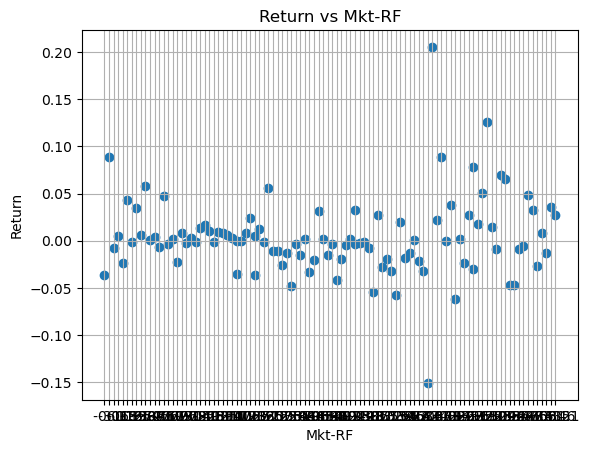

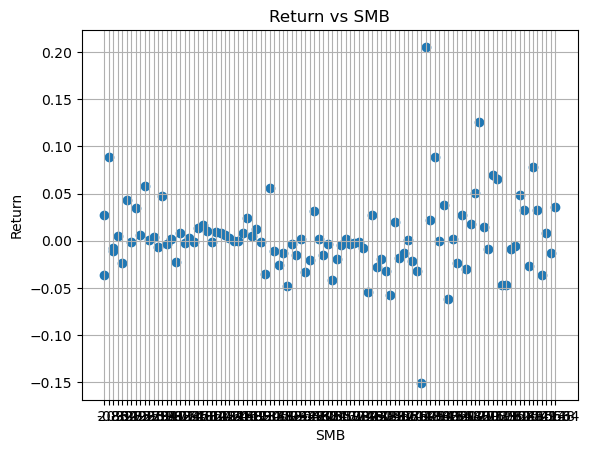

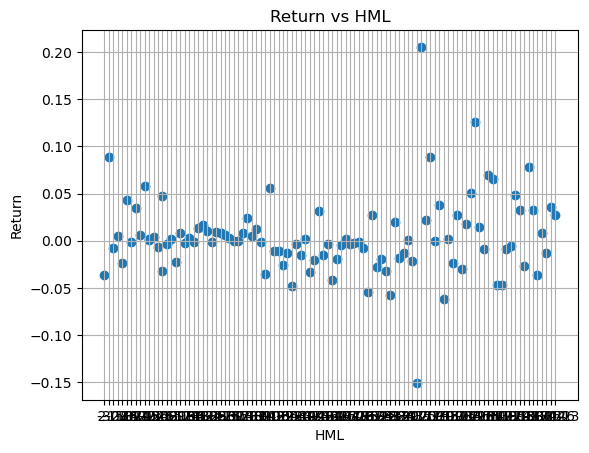

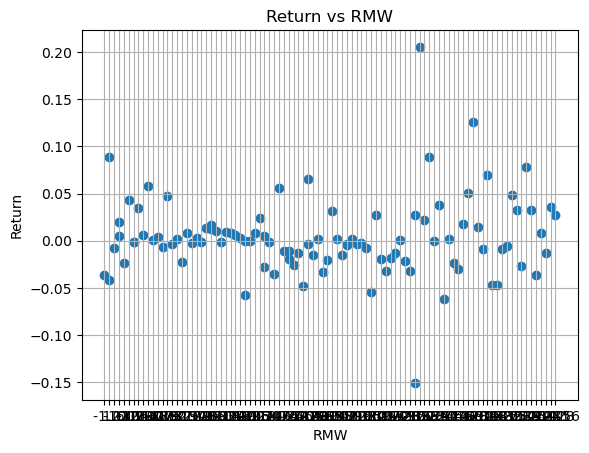

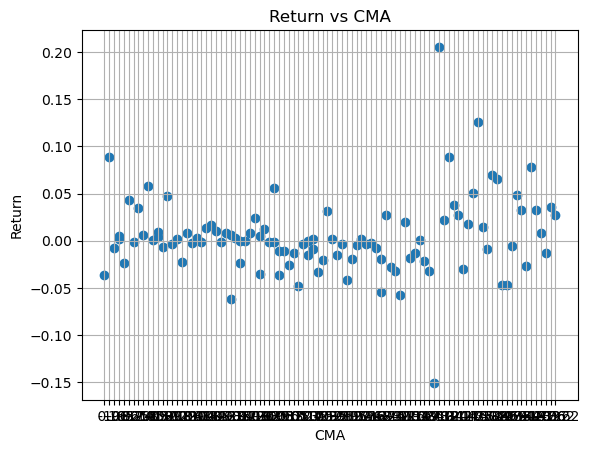

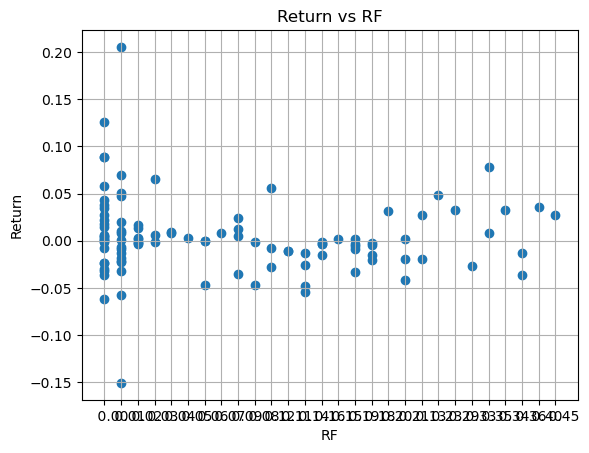

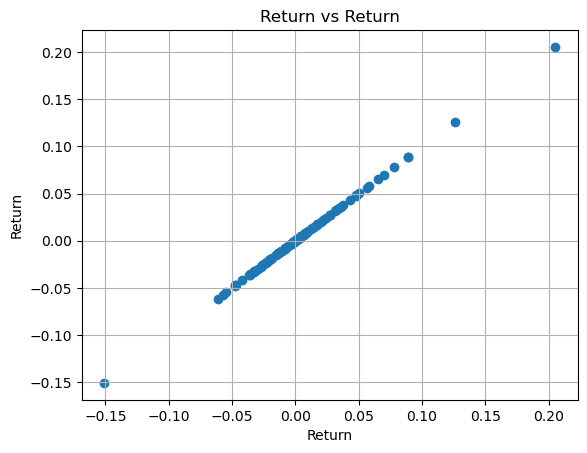

In [8]:
import matplotlib.pyplot as plt

attributes = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'Return']

# Using df as the DataFrame
for attribute in attributes:
    plt.scatter(df[attribute], df['Return'])
    plt.title(f'Return vs {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Return')
    plt.grid(True)
    plt.show()

In [9]:
for col in attributes:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
summary_stats = df[attributes].describe().T
summary_stats['skew'] = df[attributes].skew()
summary_stats['kurtosis'] = df[attributes].kurtosis()

print(summary_stats)

        count      mean       std       min      25%       50%       75%  \
Mkt-RF  104.0  0.921346  4.675040 -13.39000 -1.53500  1.145000  3.257500   
SMB     104.0 -0.041635  2.837524  -8.28000 -1.97250  0.145000  1.695000   
HML     104.0 -0.191250  3.909440 -13.87000 -2.14750 -0.475000  1.887500   
RMW     104.0  0.389327  2.106866  -4.75000 -1.13250  0.425000  1.440000   
CMA     104.0  0.024038  2.499958  -7.22000 -1.58250 -0.285000  1.325000   
RF      104.0  0.090865  0.109288   0.00000  0.01000  0.035000  0.160000   
Return  104.0  0.003732  0.040884  -0.15074 -0.01606 -0.000413  0.017233   

              max      skew  kurtosis  
Mkt-RF  13.650000 -0.357777  0.843166  
SMB      7.110000  0.088621  0.374607  
HML     12.750000  0.201573  1.846374  
RMW      7.200000  0.703814  1.268161  
CMA      7.720000  0.305577  1.115126  
RF       0.450000  1.322015  1.140330  
Return   0.205392  1.097478  7.016440  


In [11]:
# Correlation matrix
correlation_matrix = df[attributes].corr()
print(correlation_matrix)

          Mkt-RF       SMB       HML       RMW       CMA        RF    Return
Mkt-RF  1.000000  0.301272  0.020267  0.107891 -0.223265 -0.021792 -0.141622
SMB     0.301272  1.000000  0.308670 -0.362740  0.006288 -0.101711 -0.022284
HML     0.020267  0.308670  1.000000  0.165619  0.660360 -0.176223  0.379553
RMW     0.107891 -0.362740  0.165619  1.000000  0.188791 -0.020380  0.142344
CMA    -0.223265  0.006288  0.660360  0.188791  1.000000 -0.101732  0.363715
RF     -0.021792 -0.101711 -0.176223 -0.020380 -0.101732  1.000000 -0.043163
Return -0.141622 -0.022284  0.379553  0.142344  0.363715 -0.043163  1.000000


### extra credit

In [12]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, attr_name):
    # Drop NaN values
    ts_cleaned = timeseries.dropna()
    
    # If the cleaned series is constant
    if ts_cleaned.nunique() == 1:
        print(f"{attr_name} is a constant series after removing NaNs. Skipping Dickey-Fuller test.\n")
        return
    
    print(f"Results of Dickey-Fuller Test for {attr_name}:")
    dftest = adfuller(ts_cleaned, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    print("\n")

for attr in attributes:
    test_stationarity(df[attr], attr)


Results of Dickey-Fuller Test for Mkt-RF:
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vecto

### Explanation:

By conducting Dickey-Fuller tests, I observed that the p-values for are very small for 'Mkt-RF', 'SMB', 'HML', 'RMW','CMA', 'Return', meaning the time series of these factors are stationary (rejection of the null hypothesis). 

But for 'RF', its p-value is large so we don't reject the null hypothesis and thus it is non-stationary.

## Regress QMNIX on the Fama-French factors

In [13]:
import statsmodels.api as sm

# Convert relevant columns to numeric types, if they're not already
for column in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'Return']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Define independent variables (X) with the Fama-French factors and an intercept
X = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
X = sm.add_constant(X)  # Adds a constant (intercept) to the model

# Define dependent variable (Y)
Y = df['Return']

# Drop rows with missing values for regression
X_clean = X.dropna()
Y_clean = Y.loc[X_clean.index]

# Fit the OLS model
model = sm.OLS(Y_clean, X_clean).fit()

# Display model summary
print(model.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     4.528
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           0.000933
Time:                        14:51:16   Log-Likelihood:                 196.23
No. Observations:                 104   AIC:                            -380.5
Df Residuals:                      98   BIC:                            -364.6
Df Model:                           5                                         
Covariance Type:            nonrobust  

Since the p-value for intercept is greater than 0.05, the intercept is not statistically different from zero.

## Check classical linear regression assumptions

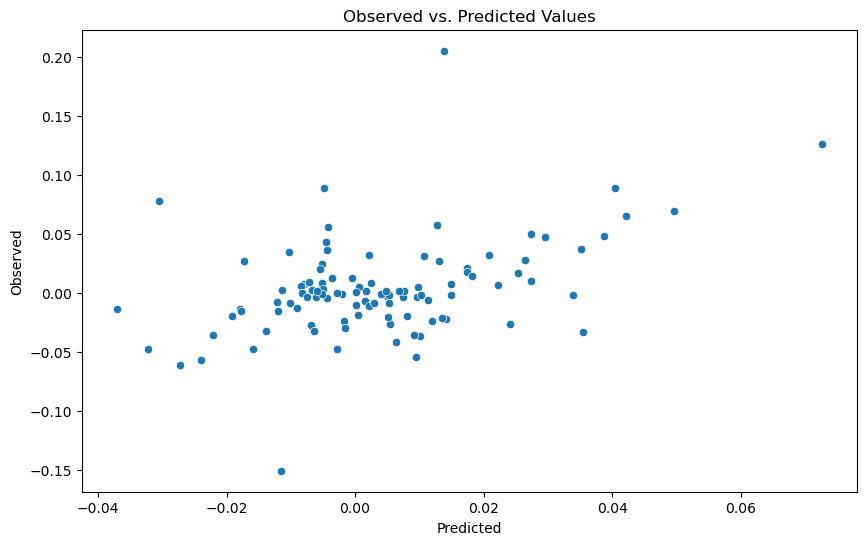

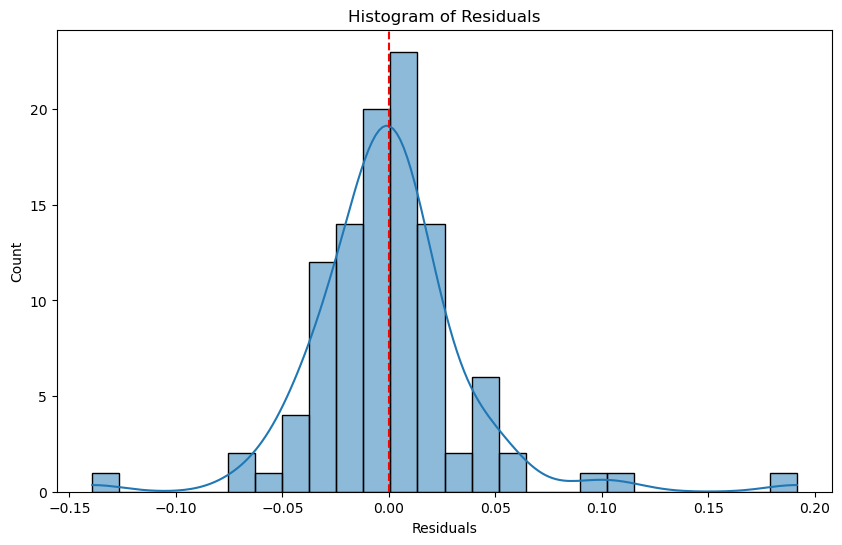

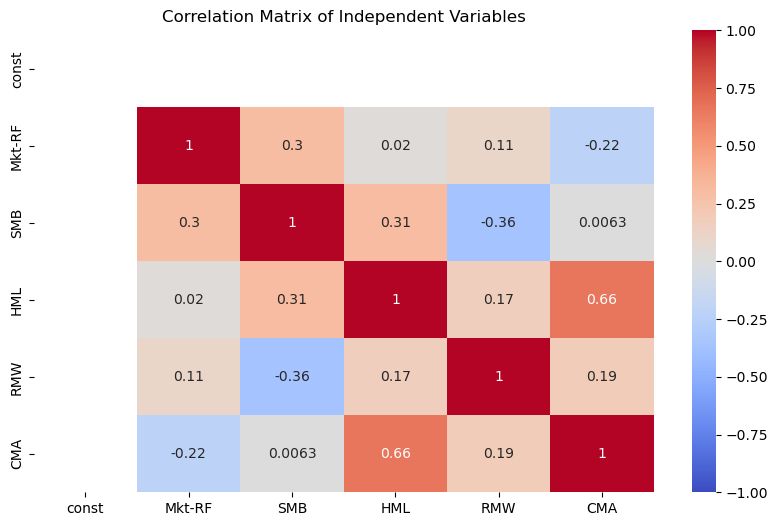

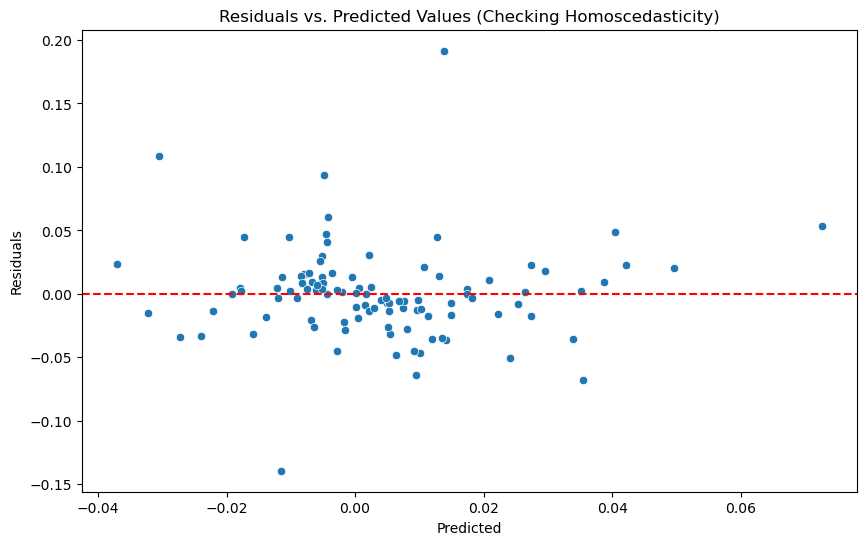

<Figure size 1000x600 with 0 Axes>

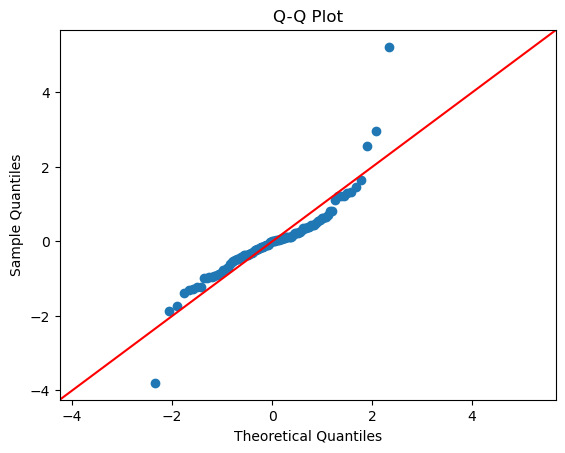

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Residuals
residuals = model.resid

# Predicted values
predicted = model.predict()

# I. Linearity
plt.figure(figsize=(10,6))
sns.scatterplot(x=predicted, y=Y_clean)
plt.title('Observed vs. Predicted Values')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()

# II. Strict Exogeneity
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.show()

# III. No Multicollinearity
corr_matrix = X.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# IV. Spherical Errors
plt.figure(figsize=(10,6))
sns.scatterplot(x=predicted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Checking Homoscedasticity)')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# V. Normality
# Q-Q plot for normality
plt.figure(figsize=(10,6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot')
plt.show()


**Linearity**: The scatter plots shows no clear patterns, suggesting linearity of the data.

**Strict Exogeneity**: The histogram of residuals is centered around zero, indicating $E[\epsilon|X] = 0$.

**No Multicollinearity**: There is a slighly high correlation between HML and CMA, in this case, 0.66. Other factors show no significant signs of collinearity.

**Spherical Errors**: The residuals vs. predicted values plot shows that the variance is roughly constant, hence $\text{Var}(\epsilon|X) = \sigma^2 I_n$.

**Normality**: The histogram of residuals looks bell-shaped, and in the Q-Q plot, most of the points lie along the 45-degree line except for three outliers.

## Financial/economic interpretation

**R-squared (0.188) and Adj. R-squared (0.146)**: These metrics give us insight into the proportion of the variance in QMNIX that is predictable from the Fama-French factors. The R-squared value of 0.188 means that the Fama-French factors explain approximately 18.8% of the variability in QMNIX returns. The adjusted R-squared, which accounts for the number of predictors in the model, is slightly lower at 14.6%. From a financial perspective, this suggests that while these factors provide some insight into the returns of QMNIX, there are other factors at play, unaccounted for in this model, that influence QMNIX returns.

**F-statistic (4.528) and Prob (F-statistic): 0.000933**: The F-statistic tests the overall significance of the regression model. The very low p-value (0.000933) indicates that at least one of the predictors is significant in explaining the variability in QMNIX returns, and that the regression model fits the data better than a model with no independent variables. In financial terms, it means that the Fama-French factors collectively have some predictive power for QMNIX returns.

**Intercept not statistically different from 0**: This implies that when all Fama-French factors are zero (which is a theoretical scenario), the expected return for QMNIX, net of the risk-free rate, would be zero. It suggests that there's no excess return unaccounted for by the model.

**Interpretation**:

From a financial perspective, this regression analysis suggests that the Fama-French factors do have some relevance in explaining the returns of QMNIX, but they don't tell the whole story. Specifically, they explain between 14.6% (adjusted for the number of factors) and 18.8% of the variation in QMNIX returns.

The intercept not being statistically different from zero suggests that the model doesn't indicate any abnormal return for QMNIX not explained by these factors.

## 10 Industry Portfolios - QMNIX - Monthly Returns

In [15]:
import pandas as pd
ip = pd.read_csv('/Users/Eric/opt/anaconda3/envs/dsm/10_Industry_Portfolios.CSV',skiprows = 11)

In [16]:
ip = ip.iloc[:1165] #focusing on monthly returns

In [17]:
ip

,Unnamed: 0,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,192607,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,2.13
1,192608,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,4.35
2,192609,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,0.29
3,192610,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,-2.84
4,192611,5.20,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,2.11
...,...,...,...,...,...,...,...,...,...,...,...
1160,202303,3.13,-0.62,0.37,-0.32,10.33,-0.13,3.49,2.49,3.89,-5.00
1161,202304,3.16,-15.24,-0.58,2.59,0.26,0.99,2.19,4.12,1.72,1.83
1162,202305,-5.35,13.52,-5.54,-9.51,8.23,-9.40,0.62,-3.67,-5.82,-2.65
1163,202306,2.84,24.66,10.69,6.42,5.91,4.63,7.89,4.66,2.61,7.44


In [18]:
ip['Date'] = pd.to_datetime(ip['Unnamed: 0'].astype(str), format='%Y%m')
df_2 = pd.merge(ip, yahoo, on='Date', how='inner') #join the two tables based on dates
df_2.drop('Unnamed: 0', axis=1, inplace=True)
df_2.dropna(inplace=True) #drop na entries

In [19]:
df_2

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Date,Return
1,-2.41,0.60,-0.11,0.54,-1.20,-2.04,1.60,-0.82,1.86,1.17,2014-12-01,-0.036574
2,-0.55,-4.36,-3.75,-4.31,-3.49,-4.47,-0.25,1.59,1.24,-6.36,2015-01-01,0.088836
3,5.13,8.18,6.14,4.73,8.25,8.91,5.56,4.24,-4.35,7.21,2015-02-01,-0.007767
4,-2.44,-0.46,-2.06,-2.49,-2.47,-2.11,0.69,0.76,-0.32,-0.59,2015-03-01,0.004892
5,0.85,-1.01,-0.71,6.67,1.44,3.60,-2.19,-1.42,0.28,0.62,2015-04-01,-0.023369
...,...,...,...,...,...,...,...,...,...,...,...,...
100,3.13,-0.62,0.37,-0.32,10.33,-0.13,3.49,2.49,3.89,-5.00,2023-03-01,-0.035831
101,3.16,-15.24,-0.58,2.59,0.26,0.99,2.19,4.12,1.72,1.83,2023-04-01,0.007883
102,-5.35,13.52,-5.54,-9.51,8.23,-9.40,0.62,-3.67,-5.82,-2.65,2023-05-01,-0.013408
103,2.84,24.66,10.69,6.42,5.91,4.63,7.89,4.66,2.61,7.44,2023-06-01,0.036240


In [20]:
import statsmodels.api as sm

# Convert relevant columns to numeric types, if they're not already
for column in ['NoDur', 'Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth ','Utils','Other','Return']:
    df_2[column] = pd.to_numeric(df_2[column], errors='coerce')

# Define independent variables (X) with the Fama-French factors and an intercept
X = df_2[['NoDur', 'Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth ','Utils','Other']]
X = sm.add_constant(X)  # Adds a constant (intercept) to the model

# Define dependent variable (Y)
Y = df_2['Return']

# Drop rows with missing values for regression
X_clean = X.dropna()
Y_clean = Y.loc[X_clean.index]

# Fit the OLS model
model = sm.OLS(Y_clean, X_clean).fit()

# Display model summary
print(model.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.004
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.446
Time:                        14:51:17   Log-Likelihood:                 190.76
No. Observations:                 104   AIC:                            -359.5
Df Residuals:                      93   BIC:                            -330.4
Df Model:                          10                                         
Covariance Type:            nonrobust  

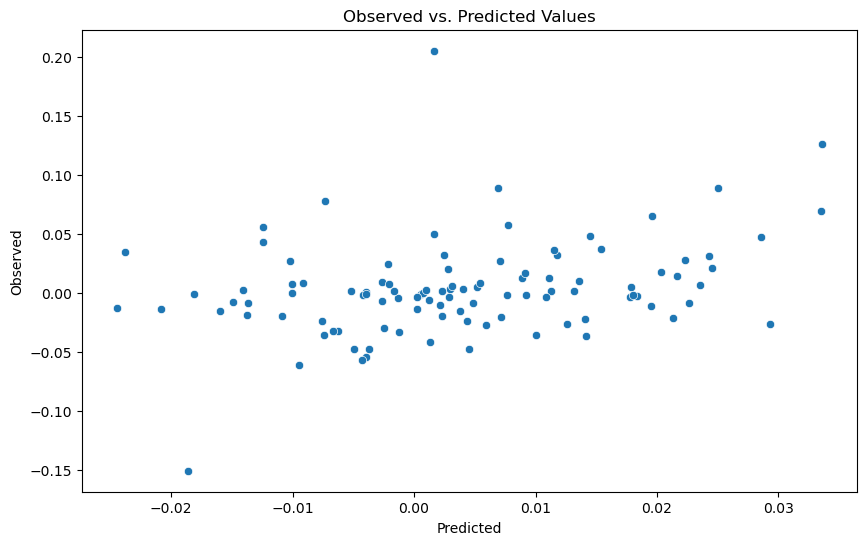

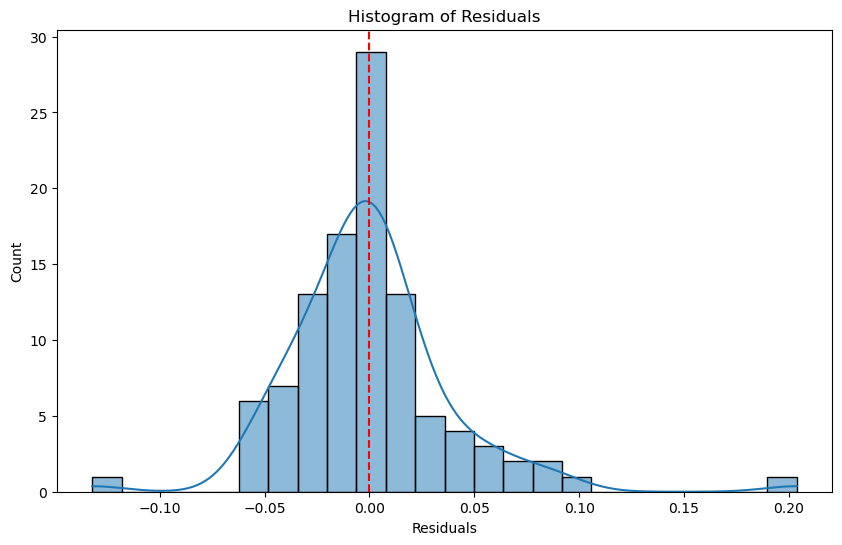

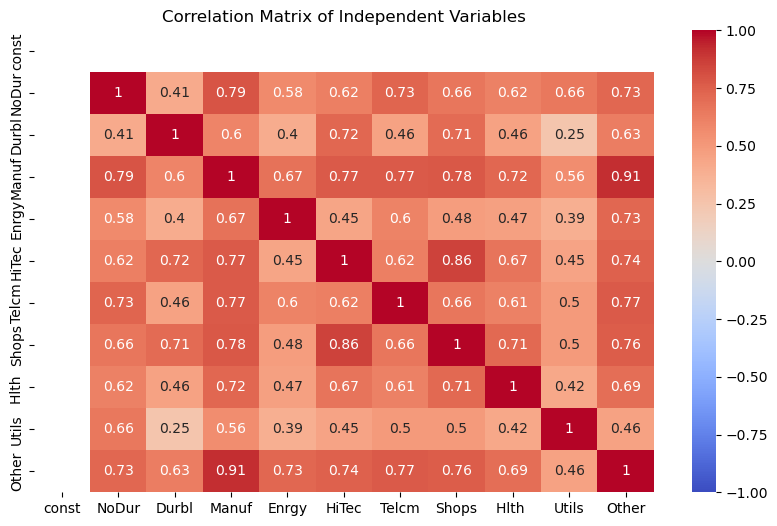

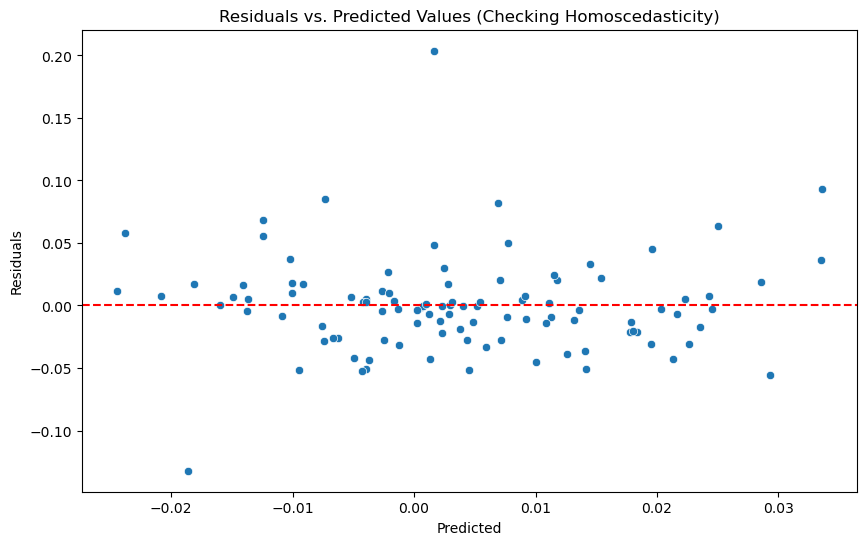

<Figure size 1000x600 with 0 Axes>

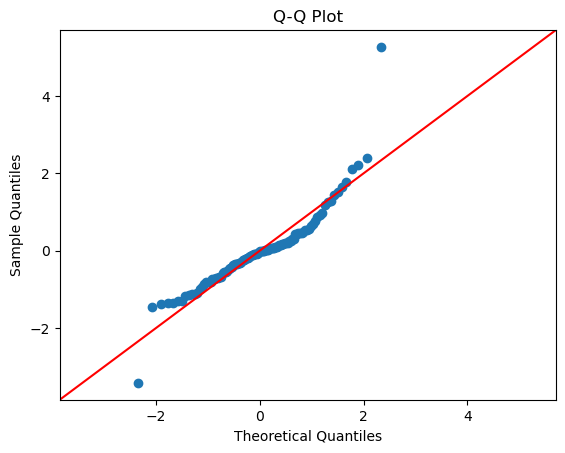

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Residuals
residuals = model.resid

# Predicted values
predicted = model.predict()

# I. Linearity
plt.figure(figsize=(10,6))
sns.scatterplot(x=predicted, y=Y_clean)
plt.title('Observed vs. Predicted Values')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()

# II. Strict Exogeneity
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.show()

# III. No Multicollinearity
corr_matrix = X.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# IV. Spherical Errors
plt.figure(figsize=(10,6))
sns.scatterplot(x=predicted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Checking Homoscedasticity)')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# V. Normality
# Q-Q plot for normality
plt.figure(figsize=(10,6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot')
plt.show()



**Linearity**: The scatter plots shows a slightly curved pattern, which may violate linearity of the data.

**Strict Exogeneity**: The histogram of residuals is centered around zero, indicating $E[\epsilon|X] = 0$.

**No Multicollinearity**: There is a slighly high correlation across most factos, violating the rule of no collinearity.

**Spherical Errors**: The residuals vs. predicted values plot shows that the variance is roughly constant except for a few outliers, hence $\text{Var}(\epsilon|X) = \sigma^2 I_n$.

**Normality**: The histogram of residuals looks slightly right-skewed, and in the Q-Q plot, the points deviate slightly from the 45-degree line. Hence, normality is not satisfied.

**R-squared (0.097)**: This indicates that approximately 9.7% of the variance in the QMNIX return can be explained by the 10 industry portfolios. This is a relatively low value, suggesting that these industry portfolios might not be strong predictors of the QMNIX return.

**Adj. R-squared (0)**: The adjusted R-squared takes into account the number of predictors in the model and adjusts for the potential of overfitting. An adjusted R-squared of 0 suggests that after accounting for the number of predictors, the industry portfolios might not add any predictive value over a simple mean model.

**F-statistic (1.004) & Prob (F-statistic) (0.446)**: The F-statistic tests the overall significance of the model. In this case, the F-statistic is very close to 1, and the associated p-value (0.446) is much higher than the common threshold (0.05). This indicates that the model isn't statistically significant at conventional levels, meaning the industry portfolios as a whole do not explain the variation in the QMNIX return significantly better than a model with no predictors.

**Log-Likelihood, AIC, & BIC**: These are metrics often used for model comparison. Higher log-likelihood values indicate better fit, while lower AIC and BIC values suggest better models when comparing multiple models. Without another model for comparison, these metrics in isolation don't offer much insight.

**Intercept**: The fact that the intercept is not statistically different from 0 means that when all predictors are 0, the expected return of QMNIX is not significantly different from zero. However, in the context of financial returns and portfolios, an intercept of zero would often imply that there's no abnormal return, i.e., no alpha.

### Financial/Economic Interpretation:

The regression suggests that the 10 industry portfolios do not provide a good explanation for the variation in the returns of QMNIX, given the low R-squared and the non-significant F-statistic. This can imply several things:

**Diversification of QMNIX**: QMNIX might be diversified across many more sectors or factors, and these 10 industry portfolios do not capture the breadth of its investments.
  
**Other Influencing Factors**: There might be other macroeconomic factors, firm-specific news, or market events that influence QMNIX returns more than these industry portfolios.
  
**Risk and Return Dynamics**: The absence of a significant alpha (intercept) indicates that the fund doesn't provide abnormal returns, given the industry portfolios as predictors. Investors might need to consider other models or factors to evaluate the performance and risk dynamics of QMNIX better.

## FF5 - QMNIX - Daliy Returns

In [22]:
ff5 = pd.read_csv('/Users/Eric/opt/anaconda3/envs/dsm/F-F_Research_Data_5_Factors_2x3_daily.CSV', skiprows=3)
qmnix = pd.read_csv('/Users/Eric/opt/anaconda3/envs/dsm/QMNIX.csv')
qmnix['Return'] = qmnix['Adj Close'].pct_change()  # Compute monthly returns

In [23]:
ff5['Date'] = pd.to_datetime(ff5['Unnamed: 0'].astype(str), format='%Y%m%d')
# Convert the 'Date' column to datetime format
qmnix['Date'] = pd.to_datetime(qmnix['Date'])

In [24]:
qmnix = qmnix[['Date','Return']]

In [25]:
ff5.drop('Unnamed: 0', axis=1, inplace=True)

In [26]:
merged_data = pd.merge(ff5, qmnix, on='Date', how='inner')

In [27]:
merged_data.dropna(inplace=True)  # Drop rows with missing data

In [28]:
df_3 = merged_data

In [29]:
df_3

,Mkt-RF,SMB,HML,RMW,CMA,RF,Date,Return
1,-1.30,-0.07,0.50,0.74,0.35,0.000,2014-10-10,0.003021
2,-1.59,1.32,0.48,-0.31,0.18,0.000,2014-10-13,-0.001004
3,0.28,0.85,-0.12,0.01,0.07,0.000,2014-10-14,-0.005025
4,-0.54,1.66,-1.33,-0.49,-0.57,0.000,2014-10-15,-0.006060
5,0.22,1.06,0.24,-0.44,0.14,0.000,2014-10-16,-0.008130
...,...,...,...,...,...,...,...,...
2211,0.25,-0.23,-0.79,0.47,-0.41,0.022,2023-07-25,-0.001065
2212,0.02,0.87,1.03,-0.35,0.65,0.022,2023-07-26,-0.001066
2213,-0.74,-0.80,0.27,0.38,0.14,0.022,2023-07-27,0.003202
2214,1.14,0.41,-0.33,-0.75,-0.40,0.022,2023-07-28,-0.002128


In [30]:
import statsmodels.api as sm

# Convert relevant columns to numeric types, if they're not already
for column in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'Return']:
    df_3[column] = pd.to_numeric(df_3[column], errors='coerce')

# Define independent variables (X) with the Fama-French factors and an intercept
X = df_3[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
X = sm.add_constant(X)  # Adds a constant (intercept) to the model

# Define dependent variable (Y)
Y = df_3['Return']

# Drop rows with missing values for regression
X_clean = X.dropna()
Y_clean = Y.loc[X_clean.index]

# Fit the OLS model
model = sm.OLS(Y_clean, X_clean).fit()

# Display model summary
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     138.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.78e-128
Time:                        14:51:17   Log-Likelihood:                 8736.4
No. Observations:                2215   AIC:                        -1.746e+04
Df Residuals:                    2209   BIC:                        -1.743e+04
Df Model:                           5                                         
Covariance Type:            nonrobust  

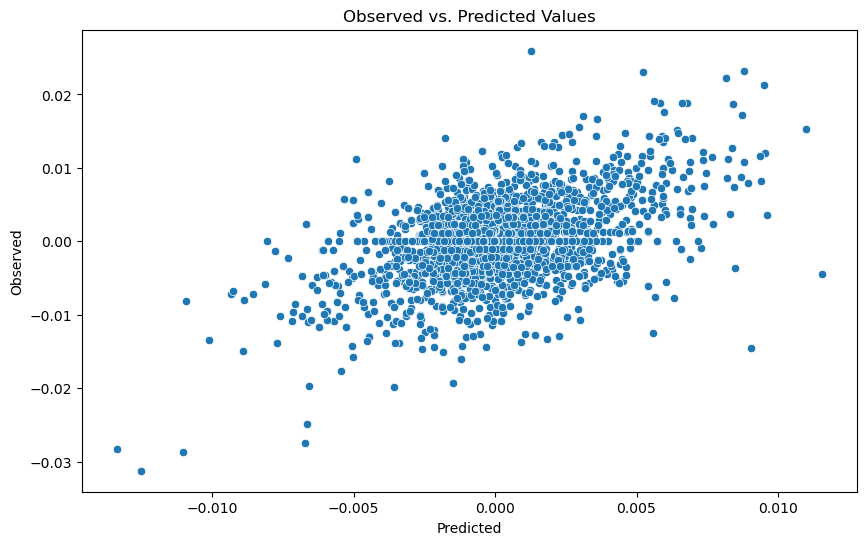

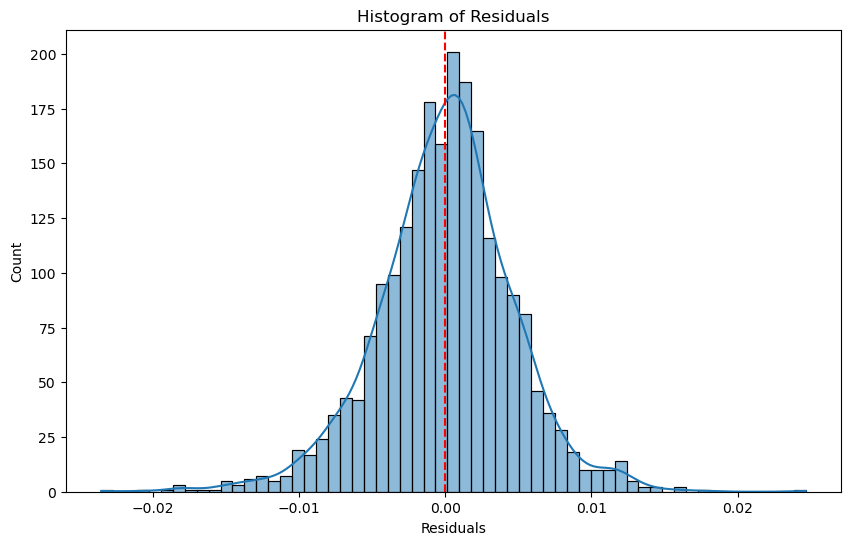

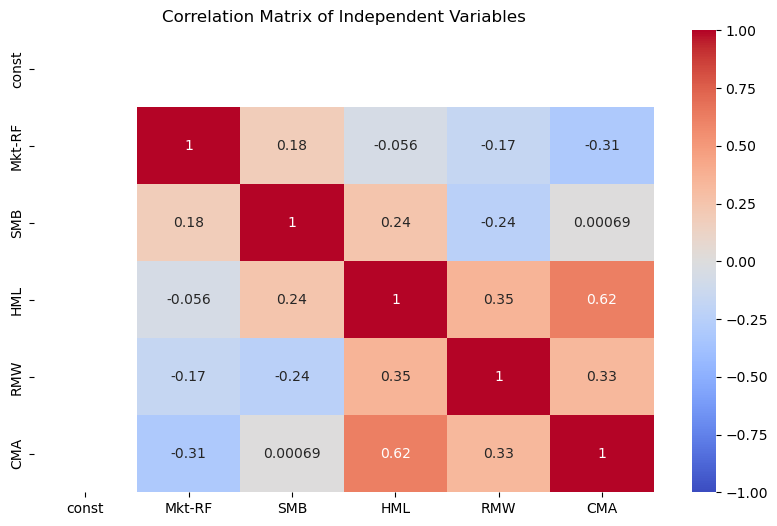

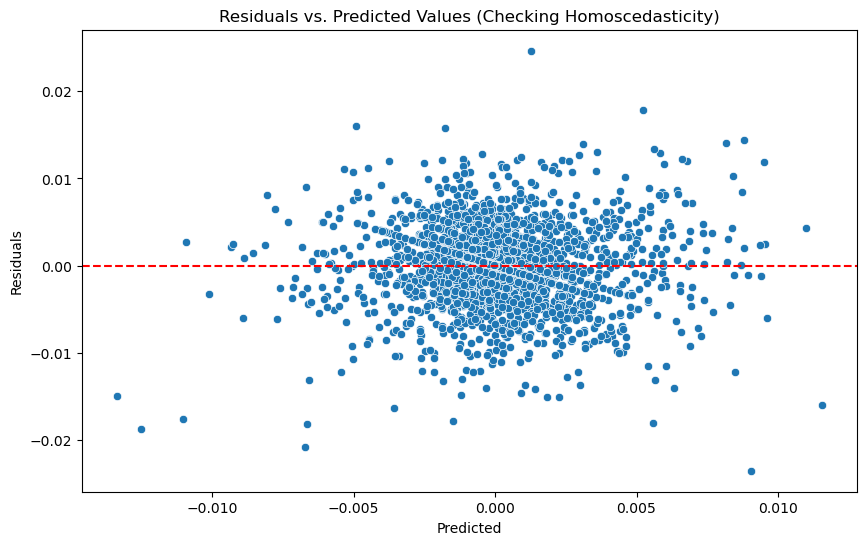

<Figure size 1000x600 with 0 Axes>

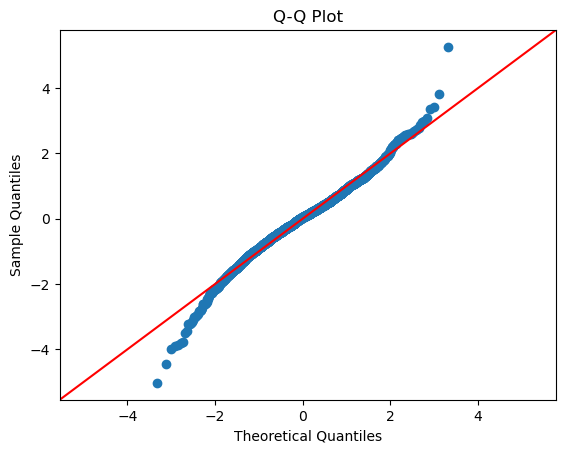

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Residuals
residuals = model.resid

# Predicted values
predicted = model.predict()

# I. Linearity
plt.figure(figsize=(10,6))
sns.scatterplot(x=predicted, y=Y_clean)
plt.title('Observed vs. Predicted Values')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()

# II. Strict Exogeneity
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.show()

# III. No Multicollinearity
corr_matrix = X.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# IV. Spherical Errors
plt.figure(figsize=(10,6))
sns.scatterplot(x=predicted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Checking Homoscedasticity)')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# V. Normality
# Q-Q plot for normality
plt.figure(figsize=(10,6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot')
plt.show()

### Assumptions:

**Linearity**: The scatter plots shows no clear patterns, suggesting linearity of the data.

**Strict Exogeneity**: The histogram of residuals is centered around zero, indicating $E[\epsilon|X] = 0$.

**No Multicollinearity**: There is a slighly high correlation between HML and CMA, in this case, 0.62. Other factors show no significant signs of collinearity.

**Spherical Errors**: The residuals vs. predicted values plot shows that the variance is roughly constant, hence $\text{Var}(\epsilon|X) = \sigma^2 I_n$.

**Normality**: The histogram of residuals looks roughly bell-shaped, and in the Q-Q plot, most of the points lie along the 45-degree line except for the points at both ends. We may assume normality is satified.

### Financial/Economic Interpretation:

**R-squared (0.239)**:
This tells us that 23.9% of the variation in daily returns of QMNIX is explained by the Fama-French 5 Factor model. From a financial perspective, this suggests that while these five factors capture some of the systemic risk and characteristics of the QMNIX returns, a substantial proportion (76.1%) of the daily return variance is due to other factors or idiosyncratic risks. This is to be expected in daily data, where individual news events, market sentiment, or other short-term factors might play a significant role.

**Adjusted R-squared (0.237)**:
The adjusted \(R^2\) is quite close to the \(R^2\), indicating that the addition of the factors in the model is adding value and isn't just inflating the \(R^2\) because of the increase in predictors. In essence, the predictors (the five factors) are relevant and aren't redundant.

**F-statistic (138.8) and Prob (F-statistic) (2.78e^-128)**:
The F-statistic tests the overall significance of the regression, and in this case, it's quite high. The extremely low p-value (essentially zero) indicates that the model is statistically significant. From an economic standpoint, this means that the Fama-French 5 Factor model is a relevant model for explaining the daily returns of QMNIX, even if it doesn't explain all the variance.

**Log-Likelihood (8736)**:
The log-likelihood is a measure of the fit of the model. A higher value means the model is fitting the observed data points better. Given this high value, it indicates that the model, with its parameters, fits the daily returns data of QMNIX quite well, compared to other potential models.

**Intercept**:
The fact that the intercept is not statistically different from zero suggests that when all the factors are valued at zero (i.e., no market risk premium, no size effect, etc.), the expected excess return of QMNIX over the risk-free rate is essentially zero. It means that QMNIX's return, on average, doesn't have a specific daily trend that's separate from the effects of the five factors.

The Fama-French 5 Factor model captures a significant portion of the daily return dynamics of QMNIX. However, with an \(R^2\) of 23.9%, it suggests that while the systemic risks associated with the market, size, value, profitability, and investment factors are crucial, other elements (possibly company-specific news, sectoral shifts, or macroeconomic events) influence the daily returns of QMNIX. Investors and portfolio managers using the Fama-French 5 Factor model to assess QMNIX would be well-advised to consider other external factors and conduct further research into what drives its returns.

### Comparision: Daily v.s. Monthly

**R-squared**:
   - **Daily Model**: 0.239 (23.9%)
   - **Monthly Model**: 0.188 (18.8%)
   
   The daily model explains about 23.9% of the variance in QMNIX returns, while the monthly model accounts for about 18.8%. This suggests that the daily data is capturing a slightly larger portion of the variability in QMNIX returns using the Fama-French 5 factors.

**Adjusted R-squared**:
   - **Daily Model**: 0.237 (23.7%)
   - **Monthly Model**: 0.146 (14.6%)
   
   Here, the difference is even more pronounced. The daily model has a considerably higher adjusted \(R^2\), indicating that the inclusion of the factors in the daily model adds more value compared to the monthly model.

**F-statistic**:
   - **Daily Model**: 138.8
   - **Monthly Model**: 4.528
   
   The F-statistic for the daily model is significantly higher than that of the monthly model, suggesting a stronger overall significance of the regression with daily data.

**Prob (F-statistic)**:
   - **Daily Model**: 2.78e^-128 (virtually zero)
   - **Monthly Model**: 0.000933
   
   Both models are statistically significant, but the daily model has a much lower p-value, reaffirming its stronger statistical significance.

**Log-Likelihood**:
   - **Daily Model**: 8736
   - **Monthly Model**: 196.23
   
   The log-likelihood in the daily model is much higher, suggesting that the daily model fits the observed data points considerably better than the monthly model.

### Conclusion

Using daily data provides different (and seemingly better) results compared to monthly data when assessing QMNIX returns with the Fama-French 5 Factor model. The daily model captures a higher proportion of the return variance, has a higher overall significance, and offers a better fit to the observed data points.

### Why the Difference?

1. **Frequency & Information**: Daily data captures short-term market dynamics and reactions that might be smoothed out or averaged in monthly data. As such, daily data can be more responsive to market events, news, or changes in investor sentiment.

2. **Sample Size**: Daily data inherently has more data points than monthly data (about 20-22 times more, depending on the month). This larger sample size can lead to more statistically significant results.

3. **Market Noise**: Daily data is also more susceptible to market 'noise' or short-term fluctuations that might not have long-term implications. This can sometimes make daily data models seem more accurate, even if those short-term fluctuations are not of interest in long-term analysis.